In [3]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)

In [44]:
data=pd.read_csv("valeursfoncieres-2018.txt", sep='|', nrows=500000000)

C:\Users\vsigogneau\AppData\Local\Temp\ipykernel_17572\1712360575.py:1: DtypeWarning:

Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.



In [20]:
pd.set_option('display.max_columns', None)
data.head()

Date mutation Nature mutation  Valeur fonciere  No voie Type de voie  \
0    03/01/2018           Vente        109000.00    13.00          RUE   
1    03/01/2018           Vente        109000.00    13.00          RUE   
2    04/01/2018           Vente        239300.00     4.00          RUE   
3    04/01/2018           Vente        239300.00     4.00          RUE   
4    04/01/2018           Vente        239300.00     4.00          RUE   

  Code voie            Voie  Code postal           Commune  Code departement  \
0      1660     GEN LOGEROT      1000.00   BOURG-EN-BRESSE                 1   
1      1660     GEN LOGEROT      1000.00   BOURG-EN-BRESSE                 1   
2      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   
3      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   
4      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   

  Code commune  Prefixe de section Section No plan  No Volume 1er lot  \
0           53                 NaN      AN      73        NaN       1   
1           53                 NaN      AN      73        NaN      13   
2           95                 NaN      AH     186        NaN     NaN   
3           95                 NaN      AH     186        NaN     NaN   
4           95                 NaN      AH     186        NaN     NaN   

   Surface Carrez du 1er lot  2eme lot  Surface Carrez du 2eme lot  3eme lot  \
0                        NaN     31.00                         NaN       NaN   
1                        NaN       NaN                         NaN       NaN   
2                        NaN       NaN                         NaN       NaN   
3                        NaN       NaN                         NaN       NaN   
4                        NaN       NaN                         NaN       NaN   

   Surface Carrez du 3eme lot  4eme lot  Surface Carrez du 4eme lot  5eme lot  \
0                         NaN       NaN                         NaN       NaN   
1                         NaN       NaN                         NaN       NaN   
2                         NaN       NaN                         NaN       NaN   
3                         NaN       NaN                         NaN       NaN   
4                         NaN       NaN                         NaN       NaN   

   Surface Carrez du 5eme lot  Nombre de lots Code type local   Type local  \
0                         NaN               2            2.00  Appartement   
1                         NaN               1            3.00   Dépendance   
2                         NaN               0            1.00       Maison   
3                         NaN               0            1.00       Maison   
4                         NaN               0            1.00       Maison   

   Surface reelle bati  Nombre pieces principales Nature culture  \
0                73.00                       4.00            NaN   
1                 0.00                       0.00            NaN   
2               163.00                       4.00              S   
3               163.00                       4.00             AG   
4                51.00                       2.00             AG   

  Nature culture speciale  Surface terrain  
0                     NaN              NaN  
1                     NaN              NaN  
2                     NaN           949.00  
3                    JARD           420.00  
4                    JARD           420.00

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              50000 non-null  int64  
 8   Date mutation               50000 non-null  object 
 9   Nature mutation             50000 non-null  object 
 10  Valeur fonciere             49027 non-null  object 
 11  No voie                     21438 non-null  float64
 12  B/T/Q                       1576 non-null   object 
 13  Type de voie                204

In [45]:
#Supression et changement de type
data.drop(columns=['Identifiant de document'], inplace=True)
data.drop(columns=['Reference document'], inplace=True)
data.drop(columns=['1 Articles CGI'], inplace=True)
data.drop(columns=['2 Articles CGI'], inplace=True)
data.drop(columns=['3 Articles CGI'], inplace=True)
data.drop(columns=['4 Articles CGI'], inplace=True)
data.drop(columns=['5 Articles CGI'], inplace=True)
data.drop(columns=['No disposition'], inplace=True)
data['Valeur fonciere'] = data['Valeur fonciere'].str.replace(',', '.').astype(float)
data.drop(columns=['B/T/Q'], inplace=True)
data['Code commune'] = data['Code commune'].astype(object)
data['No plan'] = data['No plan'].astype(object)
data['Surface Carrez du 1er lot'] = data['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
data['Surface Carrez du 2eme lot'] = data['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
data['Surface Carrez du 3eme lot'] = data['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float)
data['Surface Carrez du 4eme lot'] = data['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float)
data['Surface Carrez du 5eme lot'] = data['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float)
data['Code type local'] = data['Code type local'].astype(object)
data.drop(columns=['Identifiant local'], inplace=True)

In [8]:
data.describe()

Valeur fonciere  No voie  Code postal  Code departement  \
count         49027.00 21438.00     49905.00          50000.00   
mean         362609.22   853.53      1596.71              1.24   
std         1514315.15  2011.86       488.97              0.43   
min               1.00     1.00      1000.00              1.00   
25%           40000.00    14.00      1220.00              1.00   
50%          130000.00    54.00      1420.00              1.00   
75%          250000.00   270.00      1960.00              1.00   
max        29888484.00  9999.00      2870.00              2.00   

       Prefixe de section  No Volume  Surface Carrez du 1er lot  2eme lot  \
count             1299.00     112.00                    2300.00   1899.00   
mean               294.10       3.67                      76.95    123.53   
std                173.07       2.90                     153.95    308.95   
min                  3.00       1.00                       2.06      2.00   
25%                178.00       1.75                      45.99      9.00   
50%                271.00       3.00                      66.97     39.00   
75%                324.00       5.00                      86.50     97.00   
max                825.00      12.00                    4895.12   6033.00   

       Surface Carrez du 2eme lot  3eme lot  Surface Carrez du 3eme lot  \
count                      733.00    454.00                      114.00   
mean                        69.99    106.96                       71.52   
std                         38.32    247.28                       44.41   
min                          2.00      2.00                        6.00   
25%                         50.31      6.00                       43.87   
50%                         68.10     22.50                       64.73   
75%                         83.27     65.00                       93.48   
max                        590.85   1493.00                      250.46   

       4eme lot  Surface Carrez du 4eme lot  5eme lot  \
count    148.00                       20.00     58.00   
mean     103.07                      119.49    144.91   
std      234.74                      151.81    328.55   
min        2.00                       23.60      3.00   
25%        6.00                       57.58      7.00   
50%       14.00                       97.95     15.00   
75%       57.50                      116.85     43.00   
max     1179.00                      740.29   1180.00   

       Surface Carrez du 5eme lot  Nombre de lots  Surface reelle bati  \
count                        4.00        50000.00             22518.00   
mean                       113.96            0.24               103.13   
std                         88.36            0.59               705.72   
min                         11.00            0.00                 0.00   
25%                         66.03            0.00                17.00   
50%                        112.42            0.00                72.00   
75%                        160.36            0.00               105.00   
max                        220.00           20.00             90300.00   

       Nombre pieces principales  Surface terrain  
count                   22518.00         40158.00  
mean                        2.62          2758.08  
std                         2.17         12505.01  
min                         0.00             1.00  
25%                         0.00           190.00  
50%                         3.00           556.00  
75%                         4.00          1400.00  
max                        20.00        582829.00

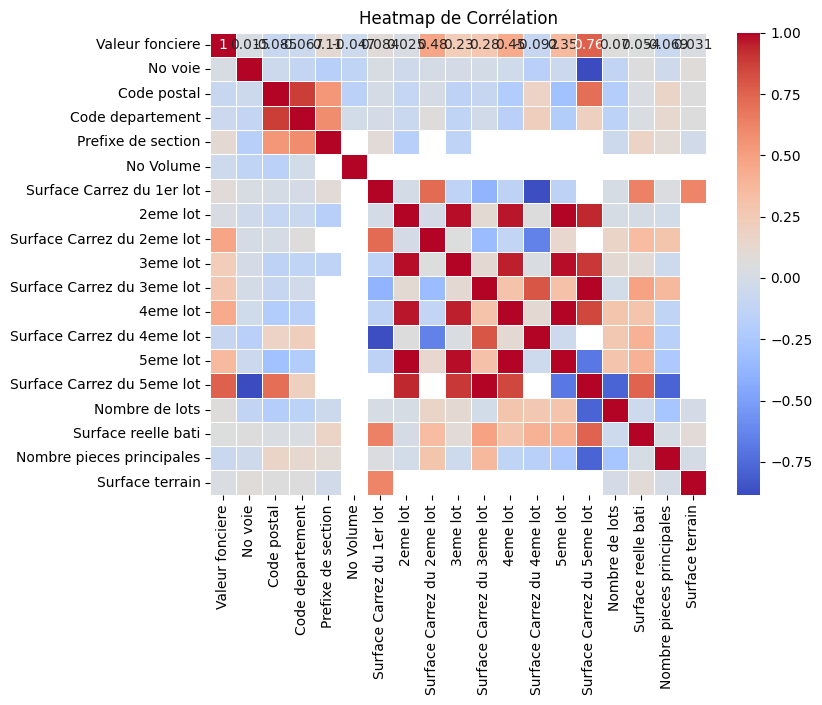

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


colonnes_numeriques = data.select_dtypes(include=['number'])

# Calculez la matrice de corrélation
matrice_correlation = colonnes_numeriques.corr()

# Créez une heatmap de corrélation
plt.figure(figsize=(8, 6))  # Ajustez la taille de la figure selon vos préférences
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', linewidths=0.5)

# Ajoutez un titre
plt.title('Heatmap de Corrélation')

# Affichez la heatmap
plt.show()


In [10]:
import plotly.express as px

In [11]:
fig = px.scatter(data, x='Valeur fonciere', y='Valeur fonciere', title='Nuage de Points')
fig.show()


In [12]:
# Supposons que vous ayez un DataFrame 'data' avec une colonne 'valeur fonciere'
# Utilisez la condition pour filtrer les lignes où 'valeur fonciere' > 2 000 000
filtre = data['Valeur fonciere'] > 2000000

# Utilisez len() pour compter le nombre d'individus satisfaisant la condition
nombre_d_individus = len(data)-len(data[filtre])
nombre_d_individus2 = len(data[filtre])

# Affichez le nombre d'individus
print("Nombre d'individus avec une valeur foncière < 2 000 000 :", nombre_d_individus)
print("Nombre d'individus avec une valeur foncière < 2 000 000 :", nombre_d_individus2)


Nombre d'individus avec une valeur foncière < 2 000 000 : 48830
Nombre d'individus avec une valeur foncière < 2 000 000 : 1170


In [50]:
#on decide d'enelver les valeurs fonceires supérieures à 2 000 000

masque = data['Valeur fonciere'] > 2000000

# Appliquez le masque de filtre pour supprimer les lignes
data = data[~masque]


In [14]:
fig = px.histogram(data['Valeur fonciere'], nbins=15, title='Histogramme des données')
fig.show()

In [22]:
data['Type local'].value_counts()

Type local
Maison                                      10047
Appartement                                  5284
Dépendance                                   5023
Local industriel. commercial ou assimilé     1636
Name: count, dtype: int64

In [23]:
data['Nature mutation'].value_counts()

Nature mutation
Vente                                 45125
Vente en l'état futur d'achèvement     2490
Echange                                 714
Adjudication                            303
Vente terrain à bâtir                   145
Expropriation                            53
Name: count, dtype: int64

In [16]:
fig = px.scatter(data, x='Valeur fonciere', y='Surface terrain', title='Nuage de Points')
fig.show()

In [30]:
data.head()

Date mutation Nature mutation  Valeur fonciere  No voie Type de voie  \
0    03/01/2018           Vente        109000.00    13.00          RUE   
1    03/01/2018           Vente        109000.00    13.00          RUE   
2    04/01/2018           Vente        239300.00     4.00          RUE   
3    04/01/2018           Vente        239300.00     4.00          RUE   
4    04/01/2018           Vente        239300.00     4.00          RUE   

  Code voie            Voie  Code postal           Commune  Code departement  \
0      1660     GEN LOGEROT      1000.00   BOURG-EN-BRESSE                 1   
1      1660     GEN LOGEROT      1000.00   BOURG-EN-BRESSE                 1   
2      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   
3      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   
4      0025  DE LA BARMETTE      1250.00  NIVIGNE ET SURAN                 1   

  Code commune  Prefixe de section Section No plan  No Volume 1er lot  \
0           53                 NaN      AN      73        NaN       1   
1           53                 NaN      AN      73        NaN      13   
2           95                 NaN      AH     186        NaN     NaN   
3           95                 NaN      AH     186        NaN     NaN   
4           95                 NaN      AH     186        NaN     NaN   

   Surface Carrez du 1er lot  2eme lot  Surface Carrez du 2eme lot  3eme lot  \
0                        NaN     31.00                         NaN       NaN   
1                        NaN       NaN                         NaN       NaN   
2                        NaN       NaN                         NaN       NaN   
3                        NaN       NaN                         NaN       NaN   
4                        NaN       NaN                         NaN       NaN   

   Surface Carrez du 3eme lot  4eme lot  Surface Carrez du 4eme lot  5eme lot  \
0                         NaN       NaN                         NaN       NaN   
1                         NaN       NaN                         NaN       NaN   
2                         NaN       NaN                         NaN       NaN   
3                         NaN       NaN                         NaN       NaN   
4                         NaN       NaN                         NaN       NaN   

   Surface Carrez du 5eme lot  Nombre de lots Code type local   Type local  \
0                         NaN               2            2.00  Appartement   
1                         NaN               1            3.00   Dépendance   
2                         NaN               0            1.00       Maison   
3                         NaN               0            1.00       Maison   
4                         NaN               0            1.00       Maison   

   Surface reelle bati  Nombre pieces principales Nature culture  \
0                73.00                       4.00            NaN   
1                 0.00                       0.00            NaN   
2               163.00                       4.00              S   
3               163.00                       4.00             AG   
4                51.00                       2.00             AG   

  Nature culture speciale  Surface terrain  
0                     NaN              NaN  
1                     NaN              NaN  
2                     NaN           949.00  
3                    JARD           420.00  
4                    JARD           420.00

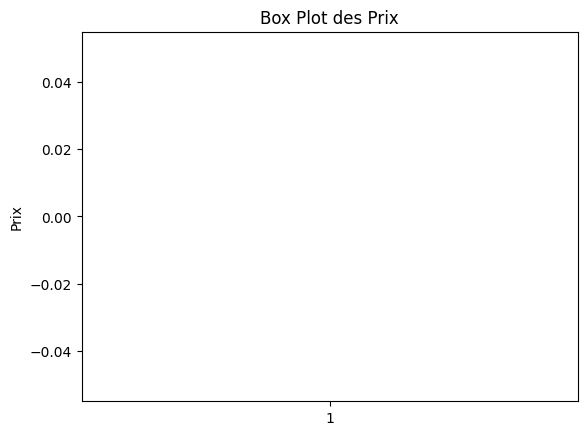

In [33]:
# Ajustez la taille de la figure selon vos préférences
plt.boxplot(data['Valeur fonciere'])
plt.title('Box Plot des Prix')
plt.ylabel('Prix')
plt.show()

In [51]:
commune=pd.read_csv("communes-departement-region.csv")
commune.rename(columns={'code_postal': 'Code postal'}, inplace=True)
merged_df = pd.merge(data, commune, on='Code postal')

In [38]:
merged_df.head()

Date mutation Nature mutation  Valeur fonciere  No voie Type de voie  \
0    03/01/2018           Vente        109000.00    13.00          RUE   
1    03/01/2018           Vente        109000.00    13.00          RUE   
2    03/01/2018           Vente        109000.00    13.00          RUE   
3    03/01/2018           Vente        109000.00    13.00          RUE   
4    03/01/2018           Vente        109000.00    13.00          RUE   

  Code voie         Voie  Code postal          Commune  Code departement  \
0      1660  GEN LOGEROT      1000.00  BOURG-EN-BRESSE                 1   
1      1660  GEN LOGEROT      1000.00  BOURG-EN-BRESSE                 1   
2      1660  GEN LOGEROT      1000.00  BOURG-EN-BRESSE                 1   
3      1660  GEN LOGEROT      1000.00  BOURG-EN-BRESSE                 1   
4      1660  GEN LOGEROT      1000.00  BOURG-EN-BRESSE                 1   

  Code commune  Prefixe de section Section No plan  No Volume 1er lot  \
0           53                 NaN      AN      73        NaN       1   
1           53                 NaN      AN      73        NaN       1   
2           53                 NaN      AN      73        NaN       1   
3           53                 NaN      AN      73        NaN      13   
4           53                 NaN      AN      73        NaN      13   

   Surface Carrez du 1er lot  2eme lot  Surface Carrez du 2eme lot  3eme lot  \
0                        NaN     31.00                         NaN       NaN   
1                        NaN     31.00                         NaN       NaN   
2                        NaN     31.00                         NaN       NaN   
3                        NaN       NaN                         NaN       NaN   
4                        NaN       NaN                         NaN       NaN   

   Surface Carrez du 3eme lot  4eme lot  Surface Carrez du 4eme lot  5eme lot  \
0                         NaN       NaN                         NaN       NaN   
1                         NaN       NaN                         NaN       NaN   
2                         NaN       NaN                         NaN       NaN   
3                         NaN       NaN                         NaN       NaN   
4                         NaN       NaN                         NaN       NaN   

   Surface Carrez du 5eme lot  Nombre de lots Code type local   Type local  \
0                         NaN               2            2.00  Appartement   
1                         NaN               2            2.00  Appartement   
2                         NaN               2            2.00  Appartement   
3                         NaN               1            3.00   Dépendance   
4                         NaN               1            3.00   Dépendance   

   Surface reelle bati  Nombre pieces principales Nature culture  \
0                73.00                       4.00            NaN   
1                73.00                       4.00            NaN   
2                73.00                       4.00            NaN   
3                 0.00                       0.00            NaN   
4                 0.00                       0.00            NaN   

  Nature culture speciale  Surface terrain code_commune_INSEE  \
0                     NaN              NaN               1053   
1                     NaN              NaN               1053   
2                     NaN              NaN               1344   
3                     NaN              NaN               1053   
4                     NaN              NaN               1053   

   nom_commune_postal libelle_acheminement ligne_5  latitude  longitude  \
0     BOURG EN BRESSE      BOURG EN BRESSE     NaN     46.21       5.25   
1     BOURG EN BRESSE      BOURG EN BRESSE    BROU     46.21       5.25   
2  ST DENIS LES BOURG   ST DENIS LES BOURG     NaN     46.21       5.18   
3     BOURG EN BRESSE      BOURG EN BRESSE     NaN     46.21       5.25   
4     BOURG EN BRESSE      BOURG EN BRESSE    BRO

In [ ]:
import folium
# Créez une carte centrée sur une latitude et une longitude initiales
carte = folium.Map(location=[latitude_initiale, longitude_initiale], zoom_start=10) # Remplacez les valeurs par vos coordonnées initiales

# Vous pouvez également ajouter un marqueur à la carte
folium.Marker([latitude, longitude], tooltip='Description du marqueur').add_to(carte)  # Remplacez les coordonnées et la description par vos propres données

# Affichez la carte
carte.save('ma_carte.html')  # Sauvegardez la carte en tant que fichier HTML


In [48]:
import pandas as pd
import folium

# Chargez des données géographiques des régions françaises au format GeoJSON
geojson_data = 'regions.geojson'  # Remplacez par le chemin de votre fichier

# Agrégez les données par région en calculant la moyenne des valeurs foncières
donnees_agrégées = merged_df.groupby('nom_region')['Valeur fonciere'].mean().reset_index()

# Créez une carte Folium centrée sur la France
carte = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajoutez une couche choroplèthe pour les régions françaises
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=donnees_agrégées,
    columns=['nom_region', 'Valeur fonciere'],
    key_on='feature.properties.nom',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valeur fonciere par région'
).add_to(carte)

# Ajoutez une légende
folium.LayerControl().add_to(carte)

# Sauvegardez la carte en tant que fichier HTML
carte.save('ma_carte_choroplethe.html')


In [53]:
data['nom_departement'].value_counts()

KeyError: 'nom_departement'

In [52]:
import pandas as pd
import folium

# Chargez des données géographiques des régions françaises au format GeoJSON
geojson_data = 'departements.geojson'  # Remplacez par le chemin de votre fichier

# Agrégez les données par région en calculant la moyenne des valeurs foncières
donnees_agrégées = merged_df.groupby('nom_departement')['Valeur fonciere'].mean().reset_index()

# Créez une carte Folium centrée sur la France
carte = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajoutez une couche choroplèthe pour les régions françaises
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=donnees_agrégées,
    columns=['nom_departement', 'Valeur fonciere'],
    key_on='feature.properties.nom',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valeur fonciere par département'
).add_to(carte)

# Ajoutez une légende
folium.LayerControl().add_to(carte)

# Sauvegardez la carte en tant que fichier HTML
carte.save('ma_carte_choroplethe.html')
